# Анализ данных и эффективность использования сервиса Яндекс-Афиша

Автор: Хазанов Михаил

Дата: 21.05.2025

## Цели и задачи проекта

Цель проекта: Провести исследовательский анализ данных сервиса Яндекс-Афиша за период с 1 июня по 31 октября 2024 года и представить результаты. Посмотреть изменения в поведении пользователей, выявить популярные события и регионы для пользователей; провести А/В тестирование по использованию мобильных и стационарных устройств.

Задачи проекта:

1) Проверить исходные данные

2) Провести их предобработку

3) Провести EDA исследовательский анализ данных

4) Проверить гипотезы через А/В тесты

5) Предоставить общие выводы и рекомендации

## Содержание проекта

1) Загрузка данных и знакомство с ними

2) Предобработка данных и подготовка к исследованию

3) Исследовательский анализ данных

4) Статистический анализ данных

5) Общий вывод и рекомендации

## Часть 1. Проверка гипотезы в Python и составление аналитической записки

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.power import NormalIndPower
from scipy import stats
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import TTestIndPower
import math


In [2]:
df_orders = pd.read_csv('...')
df_orders.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [3]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [4]:
df_events = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
df_events.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [5]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [6]:
df_tenge = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')
df_tenge.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [7]:
df_tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [8]:
# Объединение датасетов по полю event_id
merged_df = pd.merge(
    df_orders,
    df_events,
    on='event_id',
    how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

In [9]:
merged_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


Пропусков в датафреймах нет, кроме поля days_since_prev

In [10]:
# Выводим названия всех столбцов, проверяем регистр и названия в одном стиле
column_all = merged_df.columns.tolist()
column_all

['order_id',
 'user_id',
 'created_dt_msk',
 'created_ts_msk',
 'event_id',
 'cinema_circuit',
 'age_limit',
 'currency_code',
 'device_type_canonical',
 'revenue',
 'service_name',
 'tickets_count',
 'total',
 'days_since_prev',
 'event_name',
 'event_type_description',
 'event_type_main',
 'organizers',
 'region_name',
 'city_name',
 'city_id',
 'venue_id',
 'venue_name',
 'venue_address']

In [11]:
# Уникальные значения по столбцам с несоответствием
unique_user_id = merged_df['user_id'].unique()
unique_currency_code = merged_df['currency_code'].unique()
unique_device_type_canonical = merged_df['device_type_canonical'].unique()
unique_service_name = merged_df['service_name'].unique()
unique_event_type_description = merged_df['event_type_description'].unique()
unique_event_type_main = merged_df['event_type_main'].unique()
unique_region_name = merged_df['region_name'].unique()
unique_city_name = merged_df['city_name'].unique()
unique_venue_name = merged_df['venue_name'].unique()
unique_venue_address = merged_df['venue_address'].unique()

display(unique_user_id)
display(unique_currency_code)
display(unique_device_type_canonical)
display(unique_service_name)
display(unique_event_type_description)
display(unique_event_type_main)
display(unique_region_name)
display(unique_city_name)
display(unique_venue_name)
display(unique_venue_address)

array(['0002849b70a3ce2', '0005ca5e93f2cf4', '000898990054619', ...,
       'fffcd3dde79eb2c', 'fffeeb3c120cf0b', 'ffff00725179321'],
      dtype=object)

array(['rub', 'kzt'], dtype=object)

array(['mobile', 'desktop'], dtype=object)

array(['Край билетов', 'Мой билет', 'За билетом!', 'Лови билет!',
       'Билеты без проблем', 'Облачко', 'Лучшие билеты', 'Прачечная',
       'Быстробилет', 'Дом культуры', 'Весь в билетах', 'Билеты в руки',
       'Тебе билет!', 'Show_ticket', 'Городской дом культуры', 'Яблоко',
       'Билет по телефону', 'Выступления.ру', 'Росбилет',
       'Шоу начинается!', 'Мир касс', 'Восьмёрка', 'Телебилет',
       'Crazy ticket!', 'Реестр', 'Быстрый кассир', 'КарандашРУ',
       'Радио ticket', 'Дырокол', 'Вперёд!', 'Кино билет', 'Цвет и билет',
       'Зе Бест!', 'Тех билет', 'Лимоны', 'Билеты в интернете'],
      dtype=object)

array(['спектакль', 'событие', 'цирковое шоу', 'выставка', 'шоу',
       'концерт', 'спорт', 'мюзикл', 'фестиваль', nan, 'ёлка', 'балет',
       'спортивное мероприятие', 'опера', 'музыкальный спектакль',
       'кукольный спектакль', 'оперетта', 'снегурочка', 'рок-мюзикл',
       'экскурсия', 'подарок'], dtype=object)

array(['театр', 'выставки', 'другое', 'стендап', 'концерты', 'спорт', nan,
       'ёлки'], dtype=object)

array(['Каменевский регион', 'Североярская область', 'Озернинский край',
       'Лугоградская область', 'Поленовский край', 'Широковская область',
       'Медовская область', 'Златопольский округ', 'Малиновоярский округ',
       'Яблоневская область', 'Ветренский регион', 'Боровлянский край',
       'Крутоводская область', 'Ягодиновская область',
       'Серебряноярский округ', nan, 'Лесодальний край',
       'Верхоречная область', 'Горицветская область',
       'Речиновская область', 'Травиницкий округ', 'Сосновская область',
       'Серебринская область', 'Травяная область', 'Каменноярский край',
       'Солнечноземская область', 'Светополянский округ',
       'Заречная область', 'Ручейковский край', 'Глиногорская область',
       'Тепляковская область', 'Каменноозёрный край',
       'Солнечнореченская область', 'Зоринский регион',
       'Берёзовская область', 'Лесостепной край', 'Малиновая область',
       'Синегорский регион', 'Луговая область', 'Шанырский регион',
       'Каменоп

array(['Глиногорск', 'Озёрск', 'Родниковецк', 'Кристалевск',
       'Дальнозолотск', 'Радужнополье', 'Радужсвет', 'Кумсай',
       'Верховино', 'Светополье', 'Кокжар', 'Каменский', 'Лесоярич',
       'Никольянов', 'Речинцево', 'Лесозолотск', nan, 'Дальнозерск',
       'Серебрянка', 'Островецк', 'Родниковец', 'Дальнесветск',
       'Луговаярово', 'Ягодиновка', 'Дальнополин', 'Солчелуг', 'Озёрчане',
       'Серебровино', 'Лесоярово', 'Глинополье', 'Глиноград',
       'Дальнесветин', 'Северополье', 'Теплоозеро', 'Горнодолинск',
       'Ордакент', 'Озёрово', 'Луговинск', 'Лугоград', 'Златопольск',
       'Крутовинск', 'Сарыжар', 'Сосновечин', 'Тихоярск', 'Яблонецк',
       'Жаркентай', 'Широковка', 'Синеводов', 'Синеводск', 'Тихосветск',
       'Радужанов', 'Глиногорь', 'Каменосветск', 'Родниковск',
       'Травогород', 'Глинянск', 'Радужинск', 'Поляногорье',
       'Дальнолесье', 'Ручейник', 'Ключеград', 'Ключеводск', 'Поленовино',
       'Речичанск', 'Ключевополье', 'Шаныртау', 'Дальнесо

array(['Сценический центр "Деталь" Групп',
       'Музыкальная школа для детей "Аккаунт" Лтд',
       'Училище искусств "Нирвана" Инк', ...,
       'Университет искусств "Прогресс" Групп',
       'Творческая ярмарка "График" Инк', 'Школа музыки "Парадигма" Лтд'],
      dtype=object)

array(['алл. Машиностроителей, д. 19 стр. 6', 'алл. Шмидта, д. 9 стр. 4',
       'алл. Юбилейная, д. 5/6', ..., 'ш. Безымянное, д. 6',
       'алл. Тепличная, д. 4/1', 'пр. Сплавный, д. 236 к. 918'],
      dtype=object)

In [12]:
# Исследование количественных значений
print("Статистика revenue:")
print(merged_df['revenue'].describe())

print("\nСтатистика tickets_count:")
print(merged_df['tickets_count'].describe())

Статистика revenue:
count    290849.000000
mean        625.083054
std        1227.316214
min         -90.760000
25%         116.790000
50%         355.340000
75%         809.750000
max       81174.540000
Name: revenue, dtype: float64

Статистика tickets_count:
count    290849.000000
mean          2.754230
std           1.170467
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64


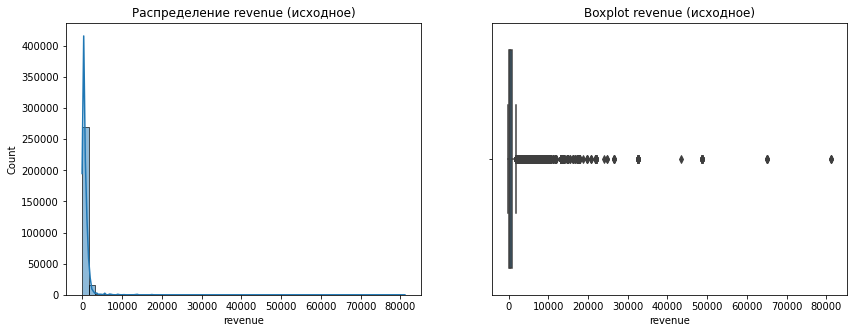

In [13]:
# Распределение выручки в исходной валюте
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(merged_df['revenue'], bins=50, kde=True)
plt.title('Распределение revenue (исходное)')

plt.subplot(1,2,2)
sns.boxplot(x=merged_df['revenue'])
plt.title('Boxplot revenue (исходное)')
plt.show()

Как видно из графиков и описания, 75% значений находится в пределах 810 рублей за билет

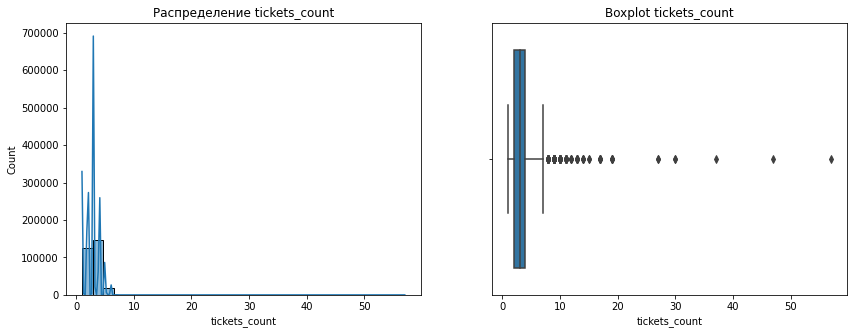

In [14]:
# Распределение tickets count
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(merged_df['tickets_count'], bins=30, kde=True)
plt.title('Распределение tickets_count')

plt.subplot(1,2,2)
sns.boxplot(x=merged_df['tickets_count'])
plt.title('Boxplot tickets_count')
plt.show()

Как видно из графиков, 75% значений находится в диапазоне не более 4 билетов за одну покупку

In [15]:
# Разделение по валюте
df_rub = merged_df[merged_df['currency_code'] == 'rub']
df_kzt = merged_df[merged_df['currency_code'] == 'kzt']

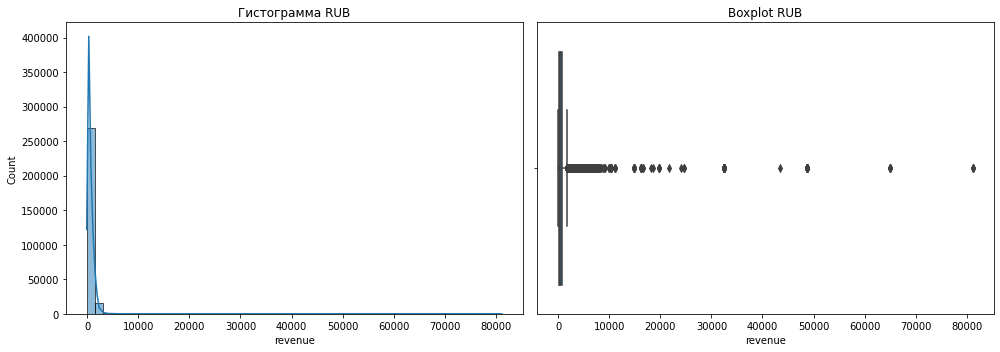

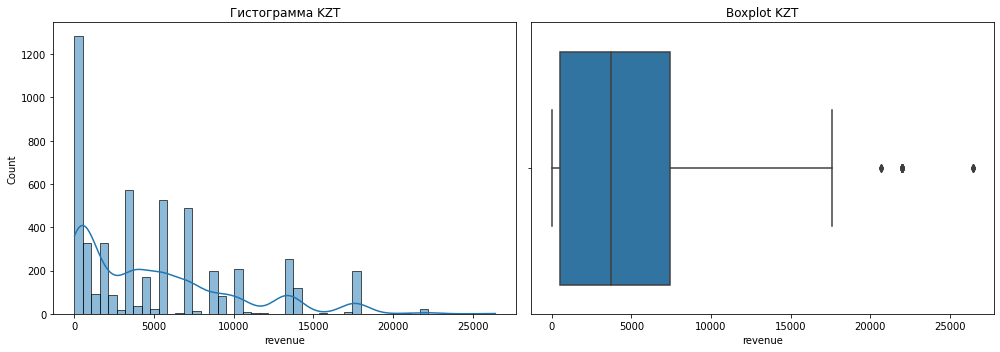

In [16]:
# Функция для отрисовки графиков
def plot_revenue_distribution(data, title):
    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)
    sns.histplot(data['revenue'], bins=50, kde=True)
    plt.title(f'Гистограмма {title}')

    plt.subplot(1,2,2)
    sns.boxplot(x=data['revenue'])
    plt.title(f'Boxplot {title}')

    plt.tight_layout()
    plt.show()

plot_revenue_distribution(df_rub, 'RUB')
plot_revenue_distribution(df_kzt, 'KZT')

В разрезе валют видим большое количество выбросов свыше покупок на 2000 рублей, при этом по тенге более равномерный график, выбросы начинаются после 17000 тенге.

In [17]:
# Удаляем по 99 процентилю
# Вычисляем пороговые значения
threshold_rub = df_rub['revenue'].quantile(0.99)
threshold_kzt = df_kzt['revenue'].quantile(0.99)

# Фильтруем выбросы
df_rub_filtered = df_rub[df_rub['revenue'] <= threshold_rub]
df_kzt_filtered = df_kzt[df_kzt['revenue'] <= threshold_kzt]

# Объединяем обратно
df_full_filtered = pd.concat([df_rub_filtered, df_kzt_filtered])
display (df_full_filtered)


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290722,6862648,ffc24188a1d58f2,2024-07-11,2024-07-11 12:39:48,538828,нет,12,kzt,mobile,4735.52,...,603c97c6-b64f-4ec6-8de9-20b95c20b2b5,концерт,концерты,№2434,Верхоречная область,Серебрянка,163.0,4348.0,"Мастерская живого действия ""Юность"" Лтд","наб. Осенняя, д. 376"
290723,6763294,ffc24188a1d58f2,2024-09-05,2024-09-05 12:07:00,538828,нет,12,kzt,mobile,4735.52,...,603c97c6-b64f-4ec6-8de9-20b95c20b2b5,концерт,концерты,№2434,Верхоречная область,Серебрянка,163.0,4348.0,"Мастерская живого действия ""Юность"" Лтд","наб. Осенняя, д. 376"
290724,3984021,ffc24188a1d58f2,2024-09-06,2024-09-06 19:20:03,533803,нет,16,kzt,mobile,1849.41,...,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162.0,3407.0,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7"
290726,8493869,ffc4133fbba20f4,2024-06-21,2024-06-21 14:04:34,533803,нет,16,kzt,mobile,3698.83,...,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162.0,3407.0,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7"


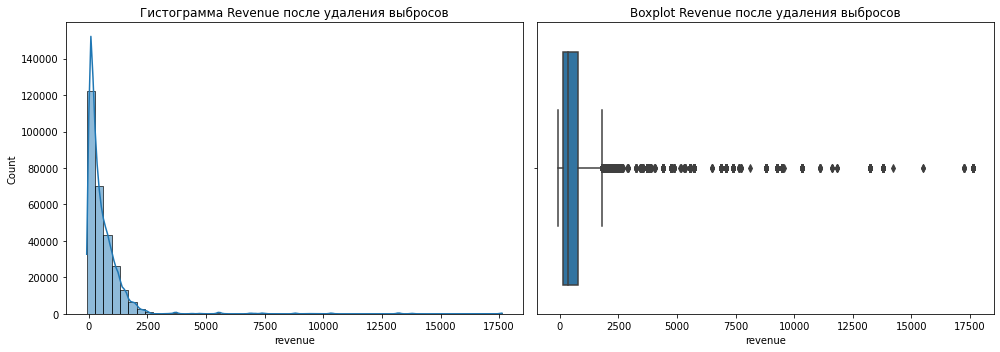

После удаления выбросов:
count    287962.000000
mean        586.692208
std         984.779977
min         -90.760000
25%         114.950000
50%         347.260000
75%         793.792500
max       17617.240000
Name: revenue, dtype: float64


In [18]:
# Повторный график по revenue
plot_revenue_distribution(df_full_filtered, 'Revenue после удаления выбросов')

# Статистика
print("После удаления выбросов:")
print(df_full_filtered['revenue'].describe())

In [19]:
# Сортируем датафрейм по всем столбцам для проверки дубликатов
merged_df_sorted = merged_df.sort_values(by=merged_df.columns.tolist())

# Находим дубликаты
duplicates = merged_df_sorted[merged_df_sorted.duplicated(keep=False)]

# Выводим дубликаты
duplicates.head(10)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address


Явных дубликатов нет

In [20]:
duplicate_columns = [
    'user_id',
 'created_dt_msk',
 'created_ts_msk',
 'event_id',
 'cinema_circuit',
 'age_limit',
 'currency_code',
 'device_type_canonical',
 'revenue',
 'service_name',
 'tickets_count',
 'total',
 'days_since_prev',
 'event_name',
 'event_type_description',
 'event_type_main',
 'organizers',
 'region_name',
 'city_name',
 'city_id',
 'venue_id',
 'venue_name',
 'venue_address']
potential_duplicates = merged_df.duplicated(subset=duplicate_columns)
duplicate_groups = merged_df[potential_duplicates].sort_values(by=duplicate_columns)

print(f"Найдено {len(duplicate_groups)} потенциальных дубликатов")
display(duplicate_groups.head(10))

Найдено 30 потенциальных дубликатов


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
11778,1123867,06eb7897f65b433,2024-08-13,2024-08-13 16:31:07,183706,нет,18,rub,mobile,69.82,...,69796237-909b-42a7-bfb5-c1b8574c4c76,спектакль,театр,№1482,Светополянский округ,Глиноград,54.0,4443.0,"Центр культурного наследия ""Объединение"" и пар...","бул. Карбышева, д. 50"
57220,160893,2564e3703075008,2024-10-30,2024-10-30 10:04:15,589005,нет,6,rub,mobile,11.23,...,bee8d0cc-282b-492e-9ed8-ec0990f43ffd,выставка,другое,№1810,Яблоневская область,Горяново,11036.0,1656.0,"Модная академия ""Пункт"" Лимитед","бул. Гагарина, д. 39"
84015,3363798,3ee7dc2e115847f,2024-06-25,2024-06-25 07:32:08,277504,нет,6,rub,mobile,59.19,...,dcb6fe75-8502-480d-b8a2-6bee187cb7ee,событие,выставки,№5015,Нежинская область,Каменёвка,76.0,3094.0,"Сообщество художников ""Палитра"" и партнеры","пр. Театральный, д. 161 стр. 2"
148477,2323916,7b525118ae656af,2024-10-28,2024-10-28 08:33:04,588203,нет,0,rub,mobile,26.96,...,88478781-0311-42e3-b0ea-d4d6a171b70a,спорт,спорт,№1503,Чистогорская область,Песчанская,21.0,2155.0,"Клуб моделей ""Гармония"" Инк","ул. Прохладная, д. 8 к. 432"
154173,5372831,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,...,09164a56-0fb3-43c7-91d3-8ed22bb3d8ef,событие,другое,№4403,Североярская область,Озёрск,2.0,2795.0,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482"
154178,5373179,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,...,09164a56-0fb3-43c7-91d3-8ed22bb3d8ef,событие,другое,№4403,Североярская область,Озёрск,2.0,2795.0,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482"
154993,3463819,7eb4fc207ecc10f,2024-09-21,2024-09-21 11:43:58,448579,нет,0,rub,mobile,2.54,...,a751c430-d352-44d7-99a0-29e97193eba5,спорт,спорт,№1622,Североярская область,Озёрск,2.0,4607.0,"Команда артистов ""Светлячок"" Лимитед","пер. Невского, д. 72"
156215,6657995,7eb4fc207ecc10f,2024-10-26,2024-10-26 09:39:03,418836,нет,0,rub,mobile,294.85,...,a4478837-4631-4e28-95d7-a4c26751a232,цирковое шоу,другое,№1703,Тепляковская область,Горнодолинск,43.0,4481.0,"Школа сценического мастерства ""Вдох"" Лтд","пер. Полярный, д. 87"
174584,6114564,8d6c1ff89fac35f,2024-10-31,2024-10-31 22:28:57,589624,нет,16,rub,desktop,41.83,...,c9eb1fa4-257b-4290-975a-7fe34b46d11b,концерт,концерты,№2121,Каменевский регион,Глиногорск,213.0,1365.0,"Картинная галерея ""Светлячок"" Лтд","ул. Дальневосточная, д. 97 к. 1/4"
176439,8248210,8f95286aa5fd8d7,2024-06-20,2024-06-20 10:57:19,244875,нет,0,rub,mobile,15.73,...,61f8b9bd-a66f-4cd9-ae10-a0e62e923476,выставка,другое,№3906,Каменноозёрный край,Ордакент,12.0,2492.0,"Кинофестиваль ""Хранитель"" Инкорпорэйтед","пр. Балтийский, д. 8 к. 51"


In [21]:
# Сортируем по временной метке
merged_df_sorted = merged_df.sort_values('created_ts_msk')

# Удаляем дубликаты
cleaned_df = merged_df_sorted.drop_duplicates(
    subset=duplicate_columns
)

display(cleaned_df)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
285516,7565637,fd4d47438ebb946,2024-06-01,2024-06-01 00:00:42,131671,нет,12,rub,mobile,1083.15,...,f4431442-3d97-452d-a6d6-eadf6bd34378,спектакль,театр,№3734,Каменевский регион,Глиногорск,213.0,4019.0,"Группа исследователей искусства ""Сказка"" Лтд","алл. Шаумяна, д. 48 стр. 584"
285517,7565521,fd4d47438ebb946,2024-06-01,2024-06-01 00:01:30,131671,нет,12,rub,mobile,812.36,...,f4431442-3d97-452d-a6d6-eadf6bd34378,спектакль,театр,№3734,Каменевский регион,Глиногорск,213.0,4019.0,"Группа исследователей искусства ""Сказка"" Лтд","алл. Шаумяна, д. 48 стр. 584"
118934,6670842,57ef0a1905ac488,2024-06-01,2024-06-01 00:01:58,375861,нет,12,rub,mobile,2091.31,...,ba89f19f-e73c-4d74-ab35-b9c023bb4de6,спектакль,театр,№1745,Лесодальний край,Родниковец,55.0,2095.0,"Молодежная творческая группа ""Студия"" Лимитед","наб. Волжская, д. 1 к. 3/9"
285519,7565550,fd4d47438ebb946,2024-06-01,2024-06-01 00:03:13,131671,нет,12,rub,mobile,812.36,...,f4431442-3d97-452d-a6d6-eadf6bd34378,спектакль,театр,№3734,Каменевский регион,Глиногорск,213.0,4019.0,"Группа исследователей искусства ""Сказка"" Лтд","алл. Шаумяна, д. 48 стр. 584"
264758,5502055,e73089d7d016cd8,2024-06-01,2024-06-01 00:03:34,211846,нет,12,rub,mobile,181.39,...,20165b73-7202-48df-a5e3-fd8cd1a70554,балет,театр,№1714,Широковская область,Радужнополье,35.0,3149.0,"Дворец культуры ""Скворечник"" Инк","пер. Кочубея, д. 7/7 к. 50"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156441,7928369,7eb4fc207ecc10f,2024-10-31,2024-10-31 23:58:55,420149,нет,6,rub,mobile,1954.78,...,ecd3a795-c65a-48ac-904e-1d78e7c43ec6,концерт,концерты,№1190,Каменевский регион,Глиногорск,213.0,2656.0,"Академия прикладного искусства ""Птица"" Лтд","алл. Песчаная, д. 677"
70064,1307669,3127060e4f02037,2024-10-31,2024-10-31 23:58:56,589958,нет,16,rub,mobile,578.72,...,58051316-2668-4dfb-b442-6859638ea711,концерт,концерты,№2121,Североярская область,Озёрск,2.0,1416.0,"Музей науки ""Спелка"" Инкорпорэйтед","наб. Карбышева, д. 9/7 стр. 3/1"
70069,1307553,3127060e4f02037,2024-10-31,2024-10-31 23:59:24,589958,нет,16,rub,mobile,578.72,...,58051316-2668-4dfb-b442-6859638ea711,концерт,концерты,№2121,Североярская область,Озёрск,2.0,1416.0,"Музей науки ""Спелка"" Инкорпорэйтед","наб. Карбышева, д. 9/7 стр. 3/1"
70068,1307582,3127060e4f02037,2024-10-31,2024-10-31 23:59:51,589958,нет,16,rub,mobile,385.81,...,58051316-2668-4dfb-b442-6859638ea711,концерт,концерты,№2121,Североярская область,Озёрск,2.0,1416.0,"Музей науки ""Спелка"" Инкорпорэйтед","наб. Карбышева, д. 9/7 стр. 3/1"


In [22]:
# Преобразование типов created_dt_msk и created_ts_msk в datetime64, city_id и venue_id в int64
merged_df['created_dt_msk'] = pd.to_datetime(merged_df['created_dt_msk'], errors='coerce')
merged_df['created_ts_msk'] = pd.to_datetime(merged_df['created_ts_msk'], errors='coerce')
merged_df['city_id'] = pd.to_numeric(merged_df['city_id'], errors='coerce').astype('Int64')  # Int64 поддерживает NA
merged_df['venue_id'] = pd.to_numeric(merged_df['venue_id'], errors='coerce').astype('Int64')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290849 non-null  int64         
 1   user_id                 290849 non-null  object        
 2   created_dt_msk          290849 non-null  datetime64[ns]
 3   created_ts_msk          290849 non-null  datetime64[ns]
 4   event_id                290849 non-null  int64         
 5   cinema_circuit          290849 non-null  object        
 6   age_limit               290849 non-null  int64         
 7   currency_code           290849 non-null  object        
 8   device_type_canonical   290849 non-null  object        
 9   revenue                 290849 non-null  float64       
 10  service_name            290849 non-null  object        
 11  tickets_count           290849 non-null  int64         
 12  total                   290849

In [23]:
print(df_tenge.head())

         data  nominal     curs  cdx
0  2024-01-10      100  19.9391  kzt
1  2024-01-11      100  19.7255  kzt
2  2024-01-12      100  19.5839  kzt
3  2024-01-13      100  19.4501  kzt
4  2024-01-14      100  19.4501  kzt


In [24]:
# Создаем новые столбцы в таблице и объединяем датафрейм с курсом тенге
df_tenge['data'] = pd.to_datetime(df_tenge['data'], errors='coerce')


# Объединение merged_df с курсом тенге по дате
merged_df = merged_df.merge(df_tenge,
    left_on='created_dt_msk', right_on='data', how='left'
)

# Конвертация выручки в рубли
def convert_currency(row):
    if row['currency_code'] == 'kzt':
        return (row['revenue'] / 100) * row['curs']
    else:
        return row['revenue']

In [25]:
merged_df['revenue_rub'] = merged_df.apply(convert_currency, axis=1)

# Выручка на один билет
merged_df['one_ticket_revenue_rub'] = merged_df['revenue_rub'] / merged_df['tickets_count']

# Месяц покупки
merged_df['month'] = merged_df['created_dt_msk'].dt.month_name()

# Сезон
def get_season(month):
    if month in ['June', 'July', 'August']:
        return 'лето'
    elif month in ['September', 'October', 'November']:
        return 'осень'
    elif month in ['December', 'January', 'February']:
        return 'зима'
    else:
        return 'весна'

merged_df['season'] = merged_df['created_dt_msk'].dt.month_name().apply(get_season)

In [26]:
display(merged_df)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt,1521.94,380.485000,August,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt,289.45,144.725000,July,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt,1258.57,314.642500,October,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt,8.49,4.245000,July,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt,1390.41,463.470000,October,осень
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290844,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.57,...,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67",2024-10-27,100,19.9266,kzt,965.57,241.392500,October,осень
290845,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.36,...,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67",2024-10-27,100,19.9266,kzt,1448.36,241.393333,October,осень
290846,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.95,...,"Клуб киноманов ""Верность"" Лтд","пр. Титова, д. 5 стр. 68",2024-10-30,100,19.9516,kzt,178.95,89.475000,October,осень
290847,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.53,...,"Гильдия художников ""Флит"" Инк","пр. Макарова, д. 4",2024-09-24,100,19.3967,kzt,661.53,330.765000,September,осень


Промежуточные выводы:

1) Явных дубликатов нет, при этом найдено 30 неявных дубликатов по order_id, они удалены.

2) Были выбросы в выручке до 81000 рублей и количестве билетов до 57 штук.

3) Удалили выбросы по 99 процентилю.

4) Преобразовали столбцы с датой в datetime, столбцы city_id и venue_id - в int64.

5) Сделали дополнительные столбцы revenue_rub, one_ticket_revenue_rub, month — месяц заказа, season — сезон.

6) Объединили датасеты с заказами и событиями, также сконвертировали тенге в рубли.


## Исследовательский анализ данных.

###  Анализ распределения заказов по сегментам и их сезонные изменения

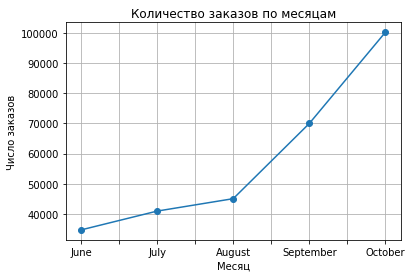

In [27]:
# Динамика заказов по месяцам
monthly_orders = merged_df.groupby('month').size().reindex([
    'June', 'July', 'August', 'September', 'October'
])

monthly_orders.plot(kind='line', marker='o', title='Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Число заказов')
plt.grid(True)
plt.show()

Количество заказов растет с каждым месяцем, в июне было приблизительно 35000 заказов, в октябре количество достигло 100000.

In [28]:
# Убедимся в наличии колонки season
merged_df['season'] = merged_df['created_dt_msk'].dt.month.map(
    lambda x: 'лето' if 6 <= x <= 8 else ('осень' if 9 <= x <= 11 else '')
)

# Оставляем только лето и осень
df_seasonal = merged_df[merged_df['season'].isin(['лето', 'осень'])]

In [29]:
# считаем доли
def get_seasonal_distribution(df, column_name):
    grouped = df.groupby(['season', column_name]).size().unstack(fill_value=0)
    distribution = grouped.div(grouped.sum(axis=1), axis=0) * 100  # Доли в %
    return distribution

In [30]:
def plot_pie_comparison(df, column, title):
    summer_data = df[df['season'] == 'лето'][column].value_counts()
    autumn_data = df[df['season'] == 'осень'][column].value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Лето
    axes[0].pie(summer_data, labels=summer_data.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
    axes[0].set_title(f'{title} — Лето')

    # Осень
    axes[1].pie(autumn_data, labels=autumn_data.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
    axes[1].set_title(f'{title} — Осень')

    plt.tight_layout()
    plt.show()

Построим круговые диаграммы по долям

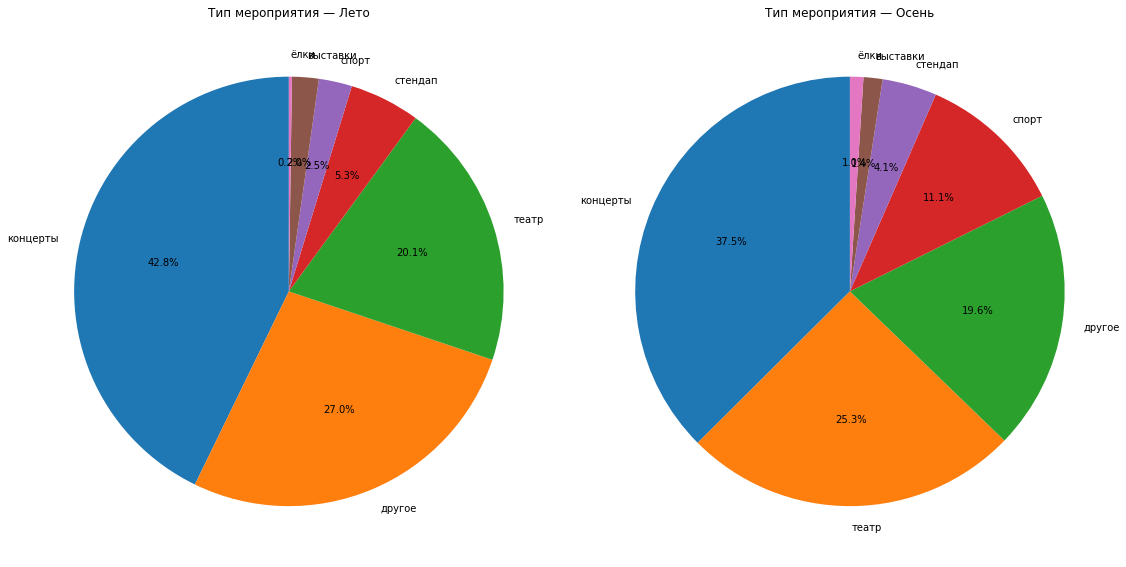

In [31]:
plot_pie_comparison(df_seasonal, 'event_type_main', 'Тип мероприятия')

Летом по типам мероприятий больше всего - концерты (42.8%), другое (27%), театр (20.1%). Осенью самые популярные мероприятия - концерты (37.5%), театр (25.3%), другое (19.6%).

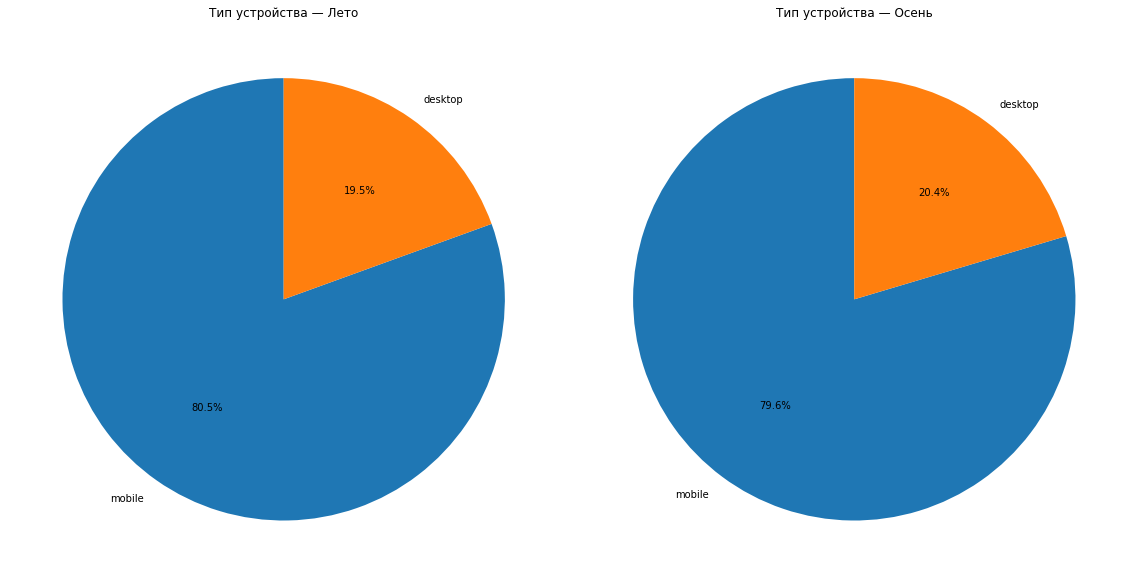

In [32]:
# по типу устройства
plot_pie_comparison(df_seasonal, 'device_type_canonical', 'Тип устройства')

По типу устройств для совершения заказа летом и осенью пропорции примерно одинаковые: 80% - с телефона, 20% - со стационарного устройства.

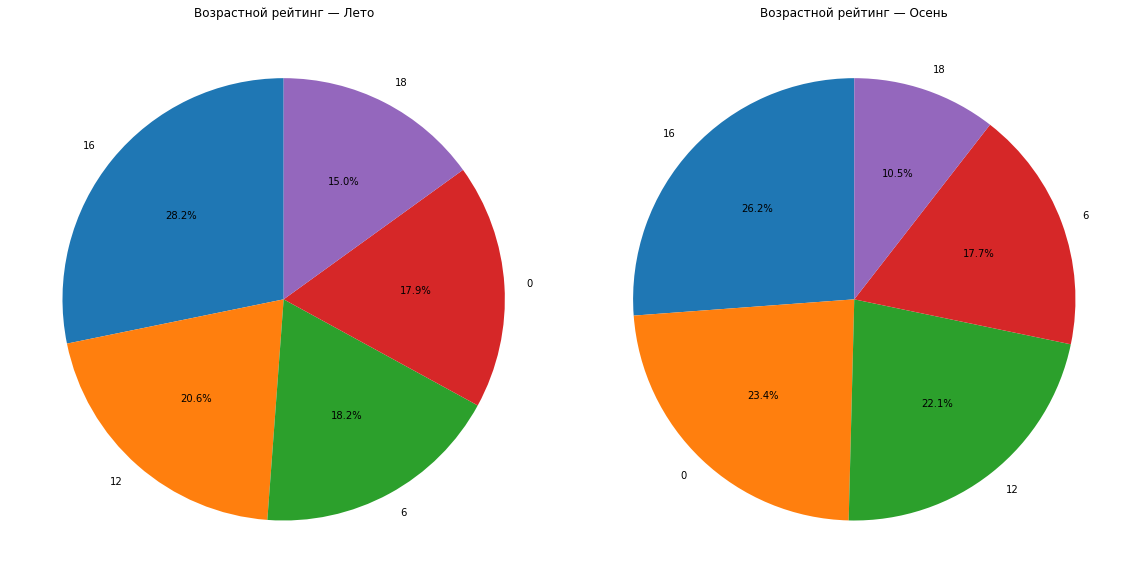

In [33]:
# По возрастному рейтингу
plot_pie_comparison(df_seasonal, 'age_limit', 'Возрастной рейтинг')

Самые популярные категории летом - 16+ (28.2%), 12+ (20.6%). Осенью - 16+ (26.2%) и 0+ (23.4%).

In [34]:
# Смотрим наличие нужных колонок
df = merged_df[['event_type_main', 'season', 'one_ticket_revenue_rub']].copy()

# Оставляем только лето и осень
df = df[df['season'].isin(['лето', 'осень'])]

# Средняя цена билета по сезонам и типу мероприятия
mean_price = df.groupby(['season', 'event_type_main'])['one_ticket_revenue_rub'].mean().unstack(fill_value=0)

# Транспонируем для удобства сравнения
mean_price = mean_price.T  # строки — типы мероприятий, столбцы — сезоны

# Добавляем колонку с изменением в процентах
mean_price['change_percent'] = (
    (mean_price['осень'] - mean_price['лето']) / mean_price['лето']
) * 100

# Сортируем по изменению (по убыванию)
mean_price_sorted = mean_price.sort_values(by='change_percent', ascending=False)

# Берём топ-10 и боттом-10 для наглядности
top_10 = mean_price_sorted.head(10)
bottom_10 = mean_price_sorted.tail(10)

# Объединяем
comparison = pd.concat([top_10, bottom_10])
comparison = comparison[~comparison.index.duplicated(keep='first')]

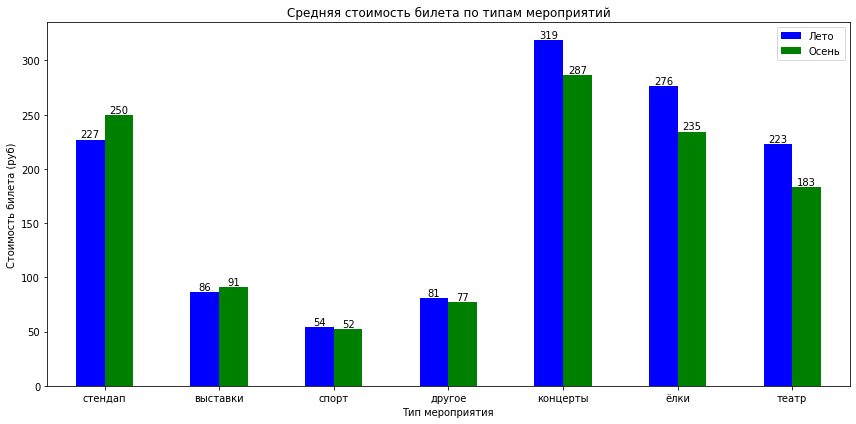

In [35]:
# Визуализация с измененными названиями
ax = comparison[['лето', 'осень']].plot(
    kind='bar', 
    figsize=(12, 6), 
    color=['blue', 'green']
)
plt.title('Средняя стоимость билета по типам мероприятий')
plt.ylabel('Стоимость билета (руб)')
plt.xlabel('Тип мероприятия')
plt.xticks(rotation=0)

# Меняем только названия в легенде
ax.legend(['Лето', 'Осень'])

plt.tight_layout()

# Добавляем подписи значений
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=10, color='black', rotation=0)

plt.grid(False)
plt.show()

Средняя стоимость выросла только в стендапе и выставках, в остальных случаях было снижение. При этом самая высокая средняя цена в категории "концерты".

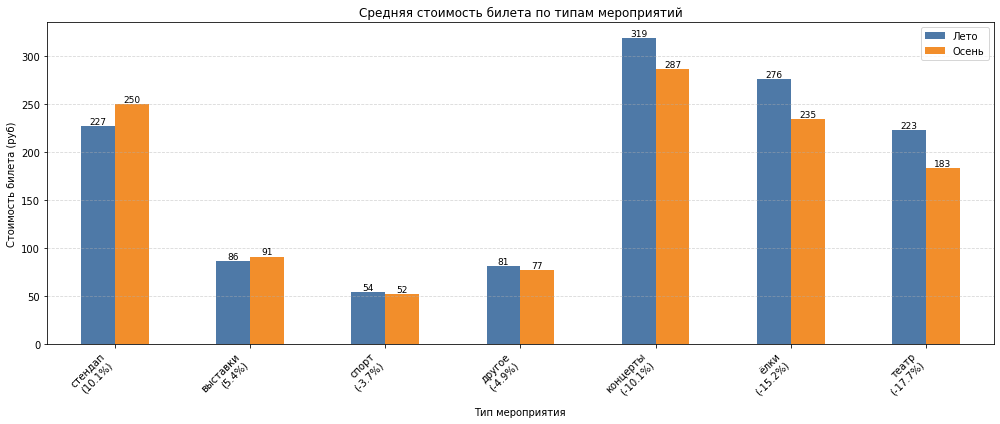

In [36]:
# Добавляем разницу в процентах: (B / A - 1) * 100
comparison['change_percent'] = ((comparison['осень'] / comparison['лето']) - 1) * 100

# Строим график
ax = comparison[['лето', 'осень']].plot(
    kind='bar', 
    figsize=(14, 6), 
    color=['#4E79A7', '#F28E2B']
)
plt.title('Средняя стоимость билета по типам мероприятий')
plt.ylabel('Стоимость билета (руб)')
plt.xlabel('Тип мероприятия')

# Подписываем ось X с указанием изменения в процентах
xtick_labels = [
    f"{index}\n({change:.1f}%)"
    for index, change in zip(comparison.index, comparison['change_percent'])
]
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

# Добавляем подписи значений над столбцами
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=9, color='black', rotation=0)

# Настройки легенды и сетки
ax.legend(['Лето', 'Осень'])
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

Как видно из графика, средняя стоимость выросла в стендапе (10.1%) и выставках (5.4%). Снижение видим в спорте (-3.7%), другом (-4.9%), концертах (-10.1%), елках (-15.2%), театре (-17.7%, это самое сильное снижение).

### Осенняя активность пользователей

In [37]:
# Фильтруем данные только за осень 2024 года (сентябрь–октябрь)
merged_df['created_dt_msk'] = pd.to_datetime(merged_df['created_dt_msk'])
autumn_mask = (merged_df['created_dt_msk'] >= '2024-09-01') & (merged_df['created_dt_msk'] <= '2024-10-31')
df_autumn = merged_df[autumn_mask].copy()

In [38]:
# Создание сводной таблицы по дням

# Добавляем колонку с датой без времени
df_autumn['date'] = df_autumn['created_dt_msk'].dt.date

# Добавляем день недели (0=понедельник, 6=воскресенье)
df_autumn['day_of_week'] = df_autumn['created_dt_msk'].dt.weekday

# Сводная таблица
daily_stats = df_autumn.groupby('date').agg(
    orders=('order_id', 'count'),
    users=('user_id', 'nunique'),
    avg_revenue_per_ticket=('one_ticket_revenue_rub', 'mean')
).reset_index()

# Заказов на пользователя
daily_stats['orders_per_user'] = daily_stats['orders'] / daily_stats['users']

# Приводим к типу datetime
daily_stats['date'] = pd.to_datetime(daily_stats['date'])

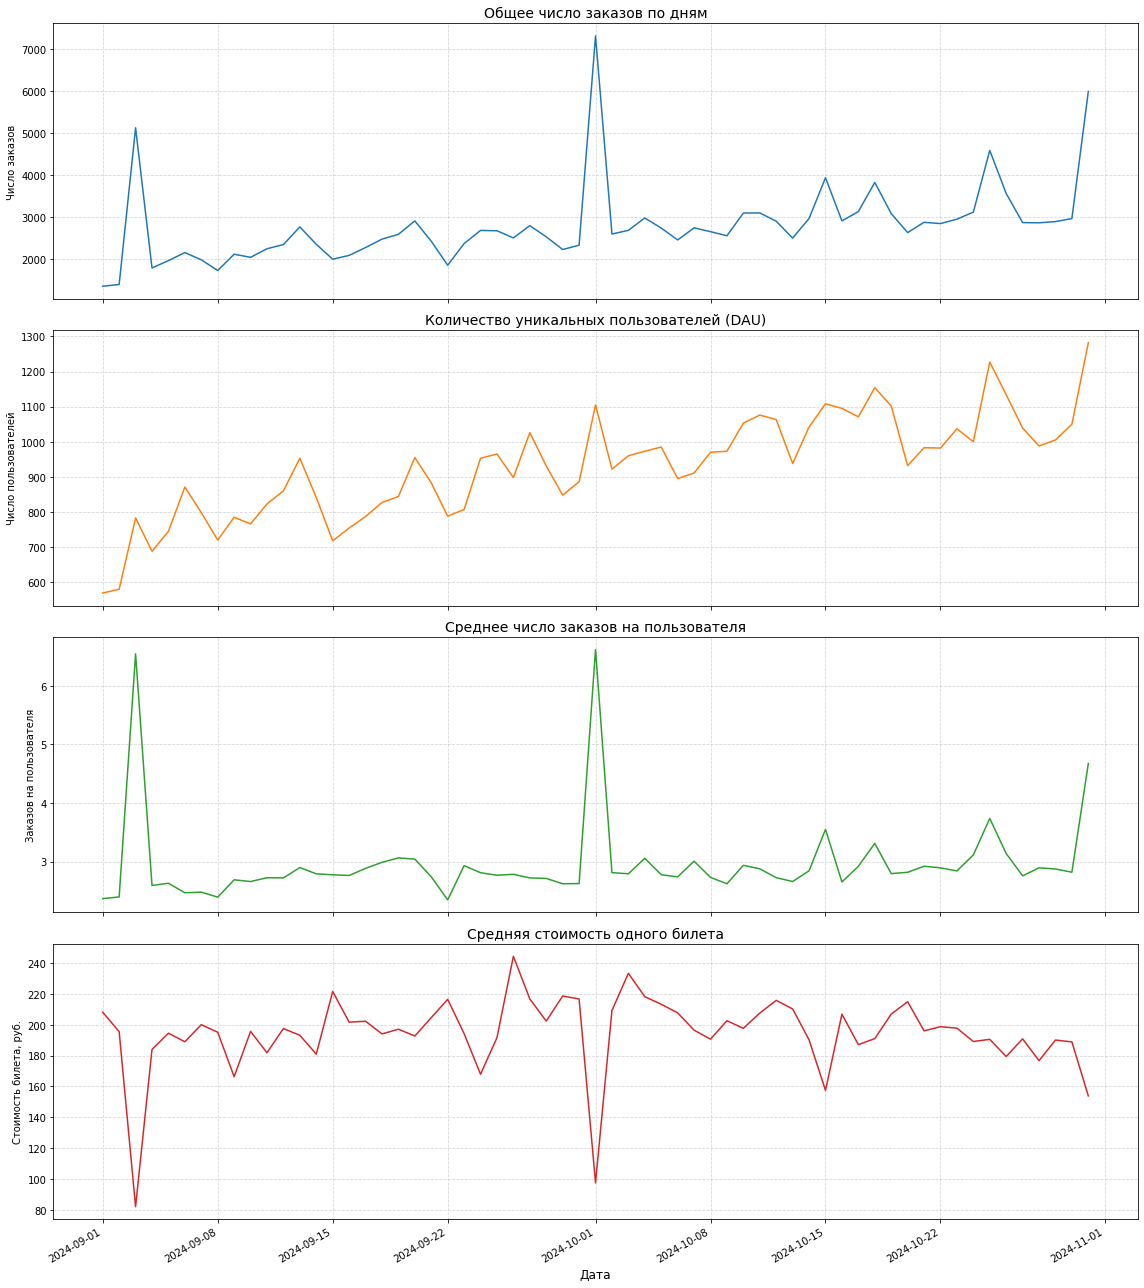

In [39]:
# Визуализация по дням

fig, axes = plt.subplots(4, 1, figsize=(16, 18), sharex=True)

# 1. Общее число заказов
axes[0].plot(daily_stats['date'], daily_stats['orders'], color='tab:blue')
axes[0].set_title('Общее число заказов по дням', fontsize=14)
axes[0].set_ylabel('Число заказов')
axes[0].grid(True, linestyle='--', alpha=0.5)

# 2. DAU — количество уникальных пользователей
axes[1].plot(daily_stats['date'], daily_stats['users'], color='tab:orange')
axes[1].set_title('Количество уникальных пользователей (DAU)', fontsize=14)
axes[1].set_ylabel('Число пользователей')
axes[1].grid(True, linestyle='--', alpha=0.5)

# 3. Среднее число заказов на пользователя
axes[2].plot(daily_stats['date'], daily_stats['orders_per_user'], color='tab:green')
axes[2].set_title('Среднее число заказов на пользователя', fontsize=14)
axes[2].set_ylabel('Заказов на пользователя')
axes[2].grid(True, linestyle='--', alpha=0.5)

# 4. Средняя стоимость одного билета
axes[3].plot(daily_stats['date'], daily_stats['avg_revenue_per_ticket'], color='tab:red')
axes[3].set_title('Средняя стоимость одного билета', fontsize=14)
axes[3].set_ylabel('Стоимость билета, руб.')
axes[3].grid(True, linestyle='--', alpha=0.5)

# Настройка оси X
for ax in axes:
    ax.set_xlabel('Дата', fontsize=12)

plt.xticks(rotation=45)  # Поворачиваем даты для лучшей читаемости
fig.autofmt_xdate()      # Автоподгон формата дат
plt.tight_layout()
plt.show()

Самые высокие "пики" по общему числу заказов по дням приходятся на 1 октября (7000), 5 сентября (5000) и 31 сентября (6000).
КОличество уникальных пользователей линейно растет от сентября к концу октября, с 600 до 1300. Самое высокое среднее число заказов - 5 сентября и 1 октября (более 6). В эти же даты самые низкие средние цены на билеты (85-100 руб).

In [40]:
# Изучаем недельную цикличность
df_autumn['day_of_week'] = pd.to_datetime(df_autumn['created_dt_msk']).dt.weekday

# Теперь создаём is_weekend:
df_autumn['is_weekend'] = df_autumn['day_of_week'].apply(lambda x: 'Выходной' if x >= 5 else 'Будний')

# 1. Группируем данные по is_weekend и считаем базовые метрики
weekly_stats = df_autumn.groupby('is_weekend').agg(
    orders=('order_id', 'count'),
    users=('user_id', 'nunique'),
    total_revenue_per_ticket=('one_ticket_revenue_rub', 'mean')
).reset_index()

# 2. Считаем avg_orders_per_user отдельно
weekly_stats['avg_orders_per_user'] = weekly_stats['orders'] / weekly_stats['users']

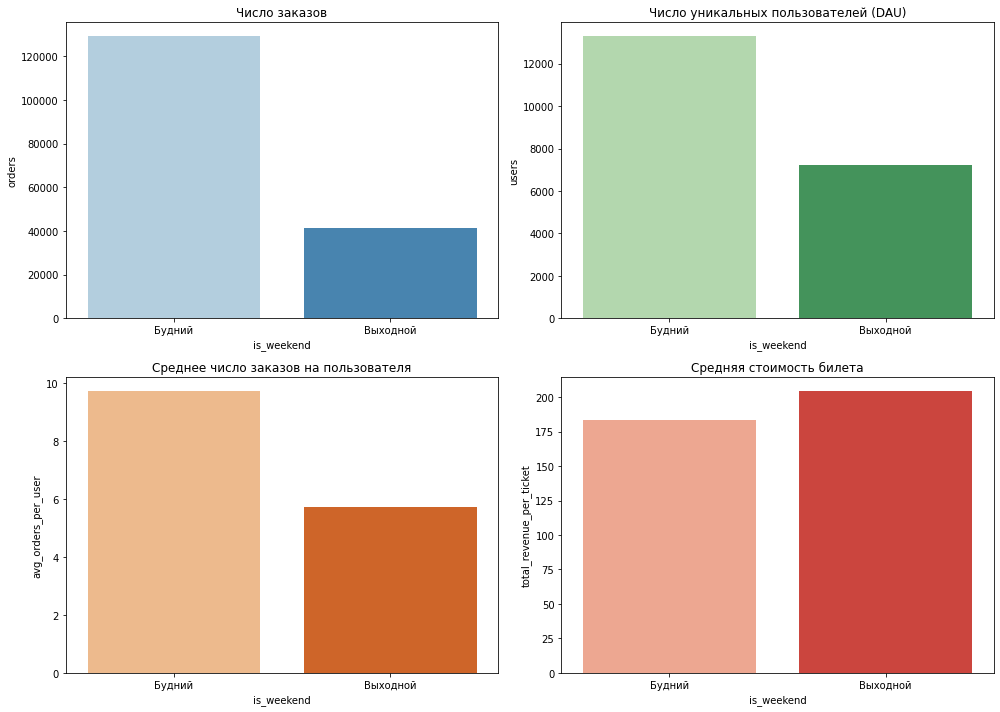

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x='is_weekend', y='orders', data=weekly_stats, ax=axes[0, 0], palette='Blues')
axes[0, 0].set_title('Число заказов')

sns.barplot(x='is_weekend', y='users', data=weekly_stats, ax=axes[0, 1], palette='Greens')
axes[0, 1].set_title('Число уникальных пользователей (DAU)')

sns.barplot(x='is_weekend', y='avg_orders_per_user', data=weekly_stats, ax=axes[1, 0], palette='Oranges')
axes[1, 0].set_title('Среднее число заказов на пользователя')

sns.barplot(x='is_weekend', y='total_revenue_per_ticket', data=weekly_stats, ax=axes[1, 1], palette='Reds')
axes[1, 1].set_title('Средняя стоимость билета')

plt.tight_layout()
plt.show()

Число заказов в будни составляет примерно 120000, в выходные 40000. По уникальным пользователям 13000 в будни и 7000 в выходные. Среднее число заказов на пользователя - 10 в будни и 6 в выходные. При этом средняя цена билета выше в выходные (200 против 180 в будни).

### Популярные события и партнеры

In [42]:
# Анализ регионов

# Группируем данные по регионам
region_stats = df_autumn.groupby('region_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'count'),
    total_revenue=('revenue_rub', 'sum')
).reset_index()

# Общие значения для расчёта долей
total_events = region_stats['unique_events'].sum()
total_orders = region_stats['total_orders'].sum()

# Расчёт долей
region_stats['event_share'] = (region_stats['unique_events'] / total_events) * 100
region_stats['order_share'] = (region_stats['total_orders'] / total_orders) * 100

# Сортировка по убыванию
region_stats = region_stats.sort_values(by='total_orders', ascending=False)

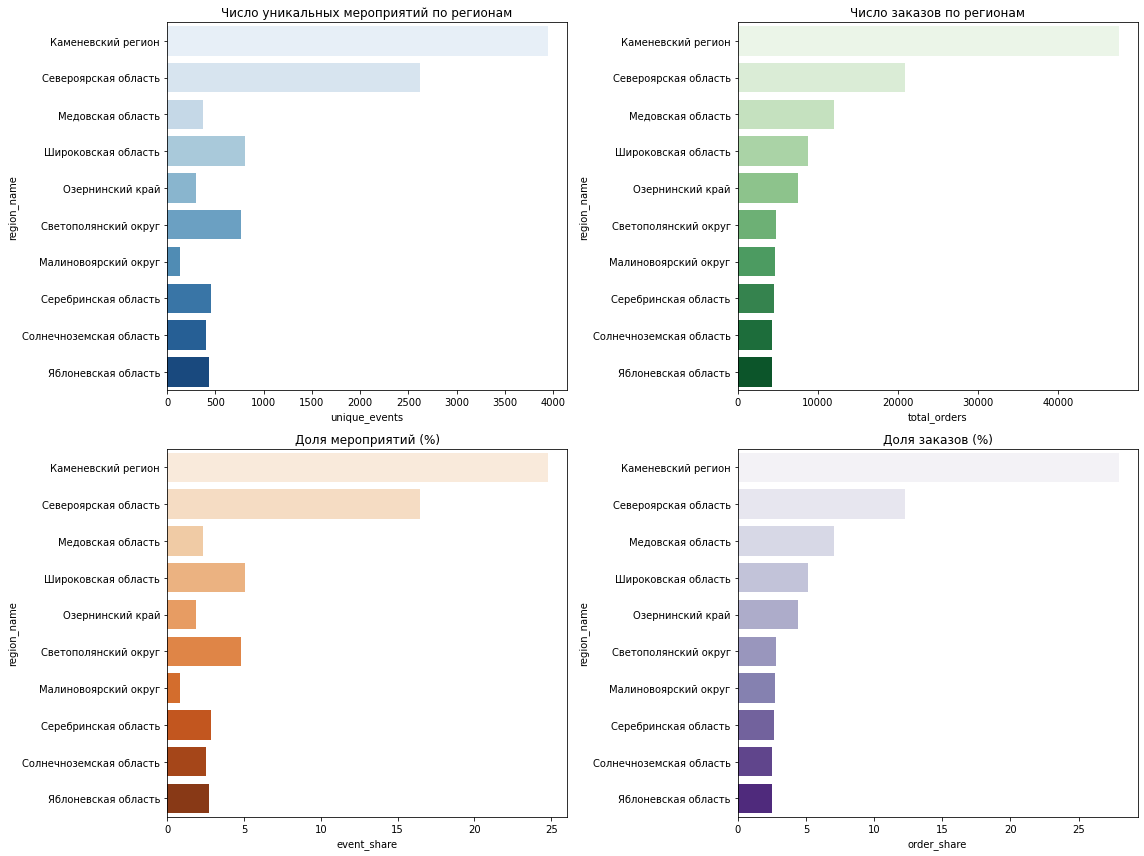

In [43]:
# Визуализация топ-регионов

top_regions = region_stats.head(10)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(x='unique_events', y='region_name', data=top_regions, ax=axes[0, 0], palette='Blues')
axes[0, 0].set_title('Число уникальных мероприятий по регионам')

sns.barplot(x='total_orders', y='region_name', data=top_regions, ax=axes[0, 1], palette='Greens')
axes[0, 1].set_title('Число заказов по регионам')

sns.barplot(x='event_share', y='region_name', data=top_regions, ax=axes[1, 0], palette='Oranges')
axes[1, 0].set_title('Доля мероприятий (%)')

sns.barplot(x='order_share', y='region_name', data=top_regions, ax=axes[1, 1], palette='Purples')
axes[1, 1].set_title('Доля заказов (%)')

plt.tight_layout()
plt.show()

По количеству уникальных мероприятий лидируют Каменевский регион и Североярская область (примерно 3900 и 2600 событий соответственно, это 25% и 15% от общего числа). По числу заказов в этих регионах соответственно более 45000 и более 20000 заказов соответственно. Это 28% и 12% от общего количества.

In [44]:
# Анализ билетных партнеров

# Группируем по партнёрам
partner_stats = df_autumn.groupby('service_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'count'),
    total_revenue=('revenue_rub', 'sum')
).reset_index()

# Общие значения для долей
total_partner_events = partner_stats['unique_events'].sum()
total_partner_orders = partner_stats['total_orders'].sum()
total_partner_revenue = partner_stats['total_revenue'].sum()

# Добавляем доли
partner_stats['event_share'] = (partner_stats['unique_events'] / total_partner_events) * 100
partner_stats['order_share'] = (partner_stats['total_orders'] / total_partner_orders) * 100
partner_stats['revenue_share'] = (partner_stats['total_revenue'] / total_partner_revenue) * 100

# Сортируем по выручке
partner_stats = partner_stats.sort_values(by='total_revenue', ascending=False)

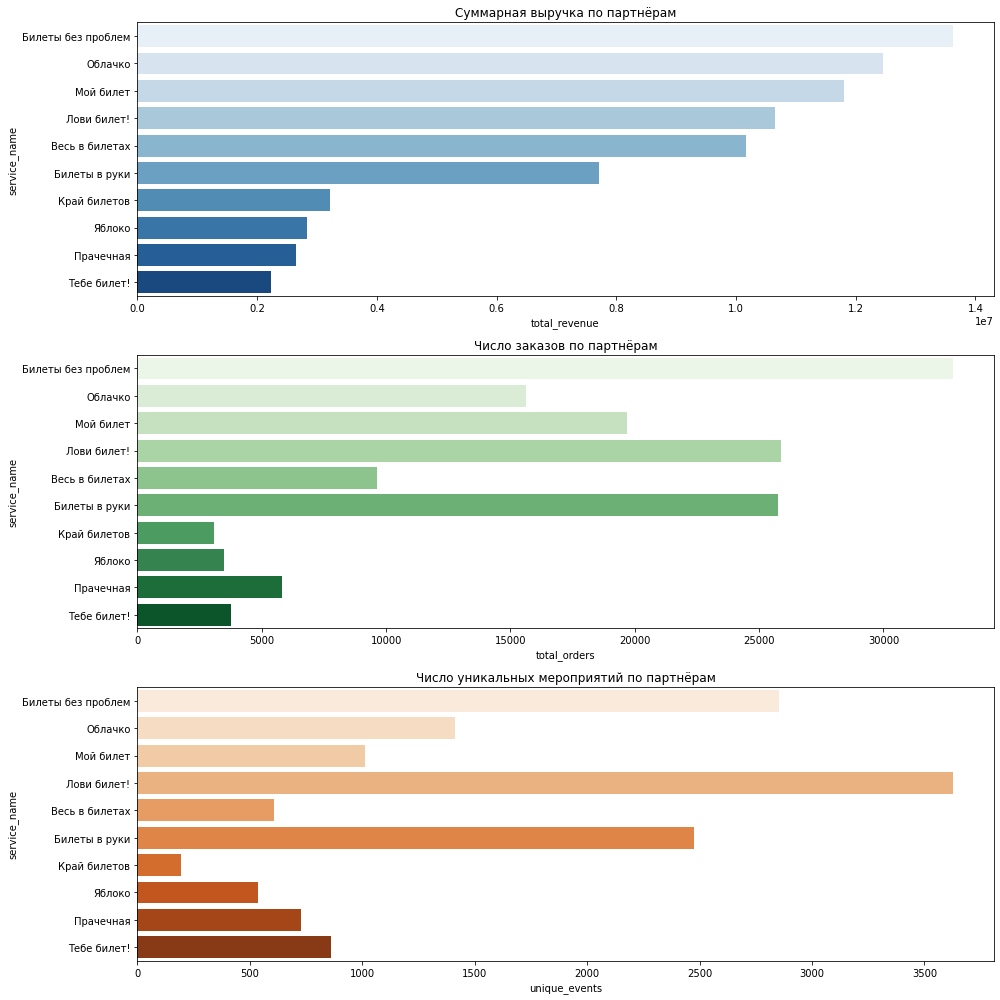

In [45]:
# Визуализация топ-партнеров

top_partners = partner_stats.head(10)

fig, axes = plt.subplots(3, 1, figsize=(14, 14))

sns.barplot(x='total_revenue', y='service_name', data=top_partners, ax=axes[0], palette='Blues')
axes[0].set_title('Суммарная выручка по партнёрам')

sns.barplot(x='total_orders', y='service_name', data=top_partners, ax=axes[1], palette='Greens')
axes[1].set_title('Число заказов по партнёрам')

sns.barplot(x='unique_events', y='service_name', data=top_partners, ax=axes[2], palette='Oranges')
axes[2].set_title('Число уникальных мероприятий по партнёрам')

plt.tight_layout()
plt.show()

По суммарной выручке лидируют "Билеты без проблем" и "Облачко", по числу заказов по партнерам - "Билеты без проблем" и "Лови билет", по числк уникальных мероприятий - "Лови билет" и "Билеты без проблем".

Каменевский район и Североярская область существенно опережают остальных по числу мероприятий и заказов.
"Билеты без проблем" - лидеры по заказам, а по уникальным мероприятиям лидирует "Лови билет".

## Статистический анализ данных

 Гипотеза 1. Среднее количество заказов на одного пользователя мобильного приложения выше, чем у пользователей стационарных устройств.

H0: Среднее число заказов на пользователя для мобильных устройств не выше, чем для десктоп-устройств. p_A <= p_B

H1: Среднее число заказов на пользователя выше у мобильных пользователей. p_B > p_A

In [46]:
# Оставляем только осень 2024
df_autumn = merged_df[merged_df['created_dt_msk'].dt.to_period('Q') == '2024Q3'].copy()

# Группируем по пользователям и типу устройства
user_device_orders = df_autumn.groupby(['user_id', 'device_type_canonical']).agg(
    orders=('order_id', 'count')
).reset_index()

In [47]:
# Распределение заказов на пользователя
mobile_orders = user_device_orders[user_device_orders['device_type_canonical'] == 'mobile']['orders']
desktop_orders = user_device_orders[user_device_orders['device_type_canonical'] == 'desktop']['orders']

print("Размер выборки:")
print(f"Mobile: {len(mobile_orders)}, Desktop: {len(desktop_orders)}")
print("\nСреднее количество заказов на пользователя:")
print(f"Mobile: {mobile_orders.mean():.2f}, Desktop: {desktop_orders.mean():.2f}")

Размер выборки:
Mobile: 13951, Desktop: 4718

Среднее количество заказов на пользователя:
Mobile: 9.03, Desktop: 6.36


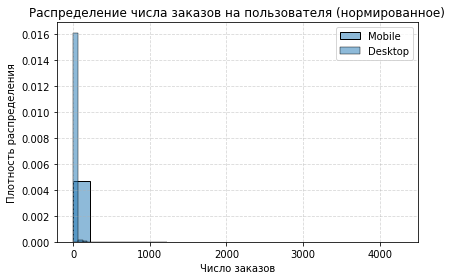

In [48]:

# Визуализация распределений с нормировкой (плотность, а не частота)
sns.histplot(mobile_orders, bins=20, alpha=0.5, label='Mobile', stat='density', common_norm=False)
sns.histplot(desktop_orders, bins=20, alpha=0.5, label='Desktop', stat='density', common_norm=False)

plt.title('Распределение числа заказов на пользователя (нормированное)')
plt.legend()
plt.xlabel('Число заказов')
plt.ylabel('Плотность распределения')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

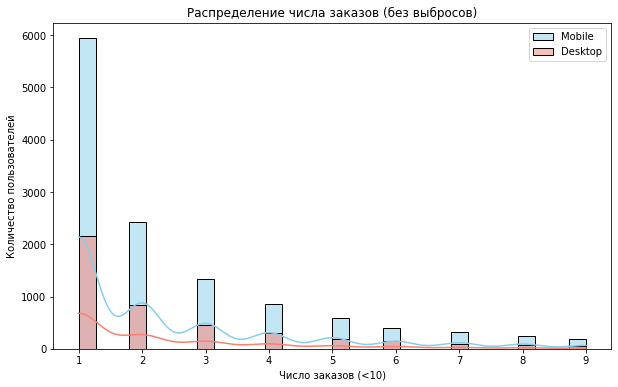

In [49]:
# Проверка распределения числа заказов
plt.figure(figsize=(10, 6))
sns.histplot(mobile_orders[mobile_orders < 10], color='skyblue', label='Mobile', bins=30, kde=True)
sns.histplot(desktop_orders[desktop_orders < 10], color='salmon', label='Desktop', bins=30, kde=True)
plt.title('Распределение числа заказов (без выбросов)')
plt.xlabel('Число заказов (<10)')
plt.ylabel('Количество пользователей')
plt.legend()
ax.grid(False)
plt.show()

Так как распределения могут быть не нормальными, используем U-тест Манна-Уитни

In [50]:
from scipy.stats import mannwhitneyu

In [51]:
stat, p_value = mannwhitneyu(mobile_orders, desktop_orders, alternative='greater')

print(f"p-value: {p_value:}")
if p_value < 0.05:
    print("Отвергаем H₀: среднее число заказов у мобильных пользователей действительно выше.")
else:
    print("Не отвергаем H₀: нет значимой разницы в числе заказов.")

p-value: 8.84368616308006e-08
Отвергаем H₀: среднее число заказов у мобильных пользователей действительно выше.


Гипотеза 2. Среднее время между заказами у пользователей мобильных устройств больше, чем у пользователей стационарных устройств.

H0: Среднее время между заказами у мобильных устройств не выше, чем у десктоп-пользователей. p_A <= p_B

H1: Среднее время между заказами больше у мобильных пользователей. p_B > p_A

In [52]:
# Оставляем только тех, у кого есть данные о предыдущей покупке
df_with_prev = df_autumn.dropna(subset=['days_since_prev'])

# Извлекаем временные интервалы по типам устройств
mobile_gaps = df_with_prev[df_with_prev['device_type_canonical'] == 'mobile']['days_since_prev']
desktop_gaps = df_with_prev[df_with_prev['device_type_canonical'] == 'desktop']['days_since_prev']

print("Среднее время между заказами:")
print(f"Mobile: {mobile_gaps.mean():.2f} дней, Desktop: {desktop_gaps.mean():.2f} дней")

Среднее время между заказами:
Mobile: 3.47 дней, Desktop: 3.02 дней


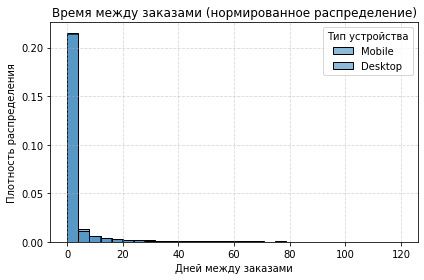

In [53]:
# Нормированные гистограммы
sns.histplot(mobile_gaps, bins=30, alpha=0.5, label='Mobile', stat='density', common_norm=False)
sns.histplot(desktop_gaps, bins=30, alpha=0.5, label='Desktop', stat='density', common_norm=False)

plt.title('Время между заказами (нормированное распределение)')
plt.xlabel('Дней между заказами')
plt.ylabel('Плотность распределения')
plt.legend(title='Тип устройства')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Опять используем U-тест Манна-Уитни , так как данные могут быть ненормальными

<div class="alert alert-info">
<h2> Комментарий студента V1 <a class="tocSkip"> </h2>

Здесь так же, как и в первой гипотезе - распределение ненормальное, оно содержит выбросы, достаточно большие промежутки между заказами. ttest был бы также менее надежным из-за требований к нормальности распределения.
</div>

In [54]:
stat, p_value = mannwhitneyu(mobile_gaps, desktop_gaps, alternative='greater')

print(f"p-value: {p_value:}")
if p_value < 0.05:
    print("Отвергаем H₀: мобильные пользователи делают заказы реже (интервал больше).")
else:
    print("Не отвергаем H₀: нет значимой разницы во времени между заказами.")

p-value: 2.4893298025240195e-44
Отвергаем H₀: мобильные пользователи делают заказы реже (интервал больше).


## Общий вывод и рекомендации

По итогам работы:
1) Были загружены данные с июня по октябрь 2024 года.

2) Проведена предобработка данных.

3) Выполнен исследовательский анализ данных.

4) Проанализирована активность пользователей.

5) Изучены популярные события и партнеры.

6) Проверены гипотезы и проведены А/В тесты.



Основные выводы:
    
1) Осенью активность пользователей увеличивается. Вероятно, это связано с сезоном после летних отпусков и каникул.

2) Самые популярные мероприятия - концерты и театры.

3) Средняя стоимость билетов в целом снижается осенью, а увеличивается только у стендапов и выставок.

4) В выходные стоимость билетов выше.

5) Лидеры по регионам - Каменевский район и Североярская область.

6) Лидеры по партнерам - "Билеты без проблем" и "Лови билет".

7) С мобильных телефонов заказов существенно, чем с десктопных версий, причем больше как летом, так и осенью.

Рекомендации:

1) Больше работать с пользователями, делающими заказы с мобильных устройств. Улучшить интерфейс, возможно сделать дополнительные скидки.

2) Максимальная активность пользователей примерно в середине недели, при этом рекомендуется сделать упор на заказ на выходные дни. В эти дни больше пользователей могут посещать мероприятия.

3) Поддерживать мероприятия в Каменевском регионе и Североярской области, это самые популярные регионы. И в то же время необходимо увеличивать активности в отстающих регионах для поднятия эффективности.

4) Продолжать активную работу с партнерами  "Билеты без проблем" и "Лови билет", а также направить активности на работу с отстающими партнерами. Либо сосредоточиться на работе с лидерами.

5) Провести мероприятия по увеличению выручки по билетам осенью. Как пример - динамическое ценообразование: при ранней покупке дешевле, при этом цена растет к дате мероприятия.

<div class="alert alert-info">
<h2> Комментарий студента V1 <a class="tocSkip"> </h2>
Попробую исправить - оставлю предыдущее и допишу новое)
    
Анализ проведён по датам за период с 1 июня по 30 октября 2024 года. Сделан объединенный датафрейм на 290611 строк.

Пропуски были только в одном столбце days_since_prev, в остальном данные заполнены полностью.
Явных дубликатов не найдено, при этом удалено 30 строк неявных дубликатов, это примерно 0.01% от общего количества.
Данные в столбцах приведены к корректному типу.

Представлена информация о мероприятиях, пользователях, выручке.
Сконвертирована валюта из тенге в рубли.
    
Данные были изучены на предмет выбросов. В разрезе валют видим большое количество выбросов. свыше покупок на 2000 рублей, при этом по тенге более равномерный график, выбросы начинаются после 17000 тенге.
75% значений находится в пределах 810 рублей за билет и не более 4 билетов за одну покупку. Были выбросы в выручке до 81000 рублей и количестве билетов до 57 штук.

Удалили выбросы по 99 процентилю.
    
Количество заказов растет с каждым месяцем, в июне было приблизительно 35000 заказов, в октябре количество достигло 100000.

Осенью средняя стоимость выросла в стендапе (10.1%) и выставках (5.4%). Снижение видим в спорте (-3.7%), другом (-4.9%), концертах (-10.1%), елках (-15.2%), театре (-17.7%, это самое сильное снижение).
    
Летом по типам мероприятий больше всего - концерты (42.8%), другое (27%), театр (20.1%). Осенью самые популярные мероприятия - концерты (37.5%), театр (25.3%), другое (19.6%).
    
По типу устройств для совершения заказа летом и осенью пропорции примерно одинаковые: 80% - с телефона, 20% - со стационарного устройства.
    
Самые популярные категории летом - 16+ (28.2%), 12+ (20.6%). Осенью - 16+ (26.2%) и 0+ (23.4%).
    
Самые высокие "пики" по общему числу заказов по дням приходятся на 1 октября (7000), 5 сентября (5000) и 31 сентября (6000).
КОличество уникальных пользователей линейно растет от сентября к концу октября, с 600 до 1300. Самое высокое среднее число заказов - 5 сентября и 1 октября (более 6). В эти же даты самые низкие средние цены на билеты (85-100 руб).
    
Число заказов в будни составляет примерно 120000, в выходные 40000. По уникальным пользователям 13000 в будни и 7000 в выходные. Среднее число заказов на пользователя - 10 в будни и 6 в выходные. При этом средняя цена билета выше в выходные (200 против 180 в будни).
    
По количеству уникальных мероприятий лидируют Каменевский регион и Североярская область (примерно 3900 и 2600 событий соответственно, это 25% и 15% от общего числа). По числу заказов в этих регионах соответственно более 45000 и более 20000 заказов соответственно. Это 28% и 12% от общего количества.
    
По суммарной выручке лидируют "Билеты без проблем" (1.35 млн) и "Облачко" (1.25 млн), по числу заказов по партнерам - "Билеты без проблем" (34000) и "Лови билет" (26000), по числу уникальных мероприятий - "Лови билет" (3700) и "Билеты без проблем" (2800).

Гипотеза 1: Мобильные пользователи совершают больше заказов, чем десктопные. Результат теста Манна-Уитни: p-value = 0.000 Нулевая гипотеза отвергнута и принимается альтернативная. Мобильные пользователи оформляют значимо больше заказов.

Гипотеза 2: Мобильные пользователи делают заказы чаще (меньше времени между покупками). → Результат теста Манна-Уитни: p-value = 0.000 Нулевая гипотеза отвергнута и принимается альтернативная. Мобильные пользователи активнее, у них промежуток между заказами меньше.
    


</div>